<a href="https://colab.research.google.com/github/bushra931/MachineLearningProjects/blob/main/BINARYSVMimageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
os.environ["KAGGLE_USERNAME"] ="bushrakhan007"
os.environ["KAGGLE_KEY"] = "5ece31b8c7c606632ca8a7c5d82a67d5"
!kaggle datasets download tongpython/cat-and-dog


 96% 210M/218M [00:02<00:00, 153MB/s]
100% 218M/218M [00:02<00:00, 110MB/s]


In [5]:
from IPython.display import clear_output
!unzip cat-and-dog.zip
clear_output()

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                      

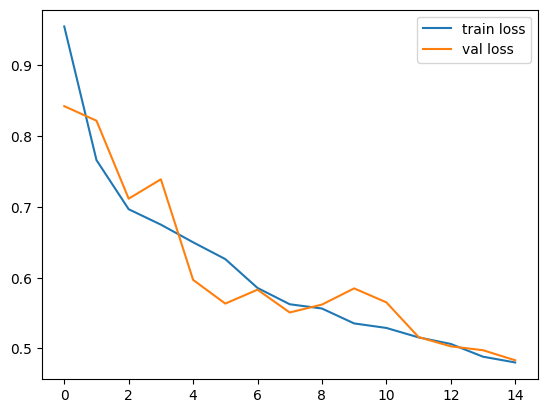

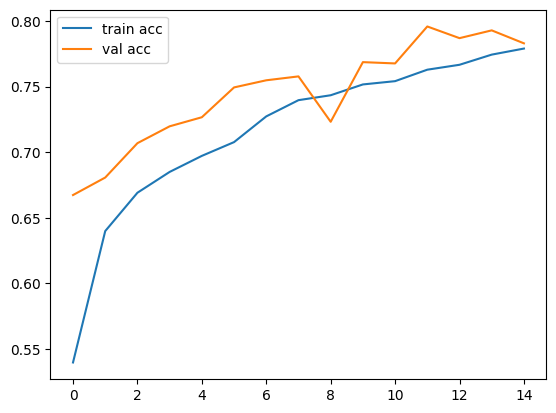

In [6]:
#importing the Usefull Modules
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

#Preprocessing the training Data using ImageDataGenerator
#One of the methods to prevent overfitting is to have more data. By this, our model will be exposed to more aspects of data and thus will #generalize better. To get more data, either you manually collect data or generate data from the existing data by applying some #transformations. The latter method is known as Data Augmentation.
#rescale: rescaling factor. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided.
#shear_range: This is the shear angle in the counter-clockwise direction in degrees.
#zoom_range: This zooms the image.
#horizontal_flip: Randomly flips the input image in the horizontal direction.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/training_set/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

#Preprocessing the test Data using ImageDataGenerator
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/test_set/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

# Creating the Model
# Importing useful models for CNN Layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
#When to use a Sequential model
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

#A Sequential model is not appropriate when:

#Your model has multiple inputs or multiple outputs
#Any of your layers has multiple inputs or multiple outputs
#You need to do layer sharing
#You want non-linear topology (e.g. a residual connection, a multi-branch model)
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
# This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

# When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(64, 64, 3) for 64x64 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

# Arguments Used:

# filters: Integer, the dimensionality of the output space.
# padding: one of "valid" or "same". "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
# kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
# activation: Activation function to use. If you don't specify anything, no activation is applied.
# strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
# Step 2 - Pooling
# Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
# Flattens the input. Does not affect the batch size.

# Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

cnn.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
#Printing out the summary of the Layers
cnn.summary()

# Training the CNN
# Compiling the CNN
# Attributes:
# optimizer: String (name of optimizer) or optimizer instance.
# loss: Loss function.
# metrics: List of metrics to be evaluated by the model during training and testing.
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
# Training the CNN on the Training set and evaluating it on the Test set
# Attributes:
# x: Input data
# validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
# epochs: Integer. Number of epochs to train the model.
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)
# Ploting the Train loss,val loss and train acc, val acc
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# Saving the trained model
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')
